In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [12]:
df=pd.read_csv("it_company.csv")
df

,Experience_Years,Age,Projects_Done,Education_Level,Department,Gender,Salary
0,2,41,9,Bachelors,Marketing,Male,36726.40
1,3,40,3,PhD,Marketing,Female,44435.72
2,0,37,9,Bachelors,Finance,Male,34393.42
3,17,51,4,Masters,Marketing,Female,58814.40
4,17,59,8,High School,Finance,Female,52726.46
...,...,...,...,...,...,...,...
495,19,28,3,PhD,Marketing,Female,75725.77
496,13,35,2,PhD,HR,Male,58317.81
497,14,28,1,Bachelors,HR,Female,49198.01
498,2,52,9,High School,IT,Female,35242.66


In [13]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Experience_Years,Age,Projects_Done,Education_Level,Department,Gender,Salary
0,2,41,9,0,3,1,36726.40
1,3,40,3,3,3,0,44435.72
2,0,37,9,0,0,1,34393.42
3,17,51,4,2,3,0,58814.40
4,17,59,8,1,0,0,52726.46
...,...,...,...,...,...,...,...
495,19,28,3,3,3,0,75725.77
496,13,35,2,3,1,1,58317.81
497,14,28,1,0,1,0,49198.01
498,2,52,9,1,2,0,35242.66


In [20]:
x=df.drop("Salary",axis=1)
y=df["Salary"]


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [22]:
model=LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [23]:
y_pre=model.predict(x_test)
y_pre

array([52878.87050079, 36397.48666885, 49662.75253593, 36957.67281118,
       60430.92290587, 56578.5866242 , 53541.99894032, 35909.42476784,
       44669.41336377, 68208.81334703, 61785.08750639, 56838.58101712,
       53851.54684751, 51213.77859858, 47666.72181817, 59009.04889101,
       68421.94062235, 58152.0220027 , 63016.87894295, 60992.29174196,
       39745.94821735, 41128.79788717, 58359.00571019, 35180.66462546,
       57888.15978484, 58702.29857716, 48674.26130189, 52522.856057  ,
       49211.33741216, 44683.89913628, 41795.373782  , 40527.22327776,
       52544.16865899, 50594.08933106, 30936.39769032, 51109.70275358,
       57617.1100294 , 50389.250316  , 41241.59947253, 41079.41855174,
       38774.70578411, 40705.02111964, 67036.07793838, 47368.13152258,
       51566.24749207, 43093.43031262, 33582.86919613, 56235.09171701,
       45069.56232278, 39470.85211528, 48277.70782881, 54476.67896664,
       61811.36218276, 56594.01895963, 52797.37065715, 41182.59571429,
      

In [24]:
mse=mean_squared_error(y_pre,y_test)
rmse=np.sqrt(mse)
print(mse)
print(rmse)
score=r2_score(y_pre,y_test)
print(f"accuracy score :{score*100:.2f}%")


24077051.97655096
4906.837268195366
accuracy score :71.13%


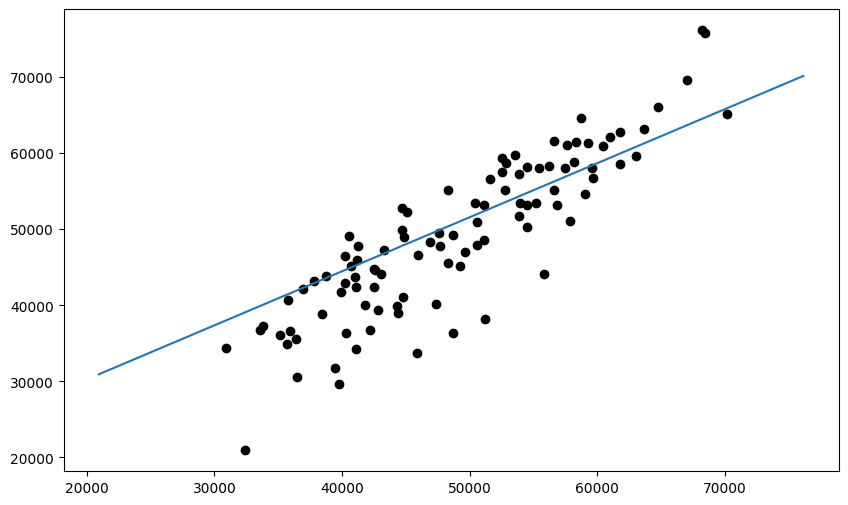

In [27]:
plt.figure(figsize=[10,6])
plt.scatter(y_pre,y_test,c="k")
plt.plot([y_test.min(),y_test.max()],[y_pre.min(),y_pre.max()])
plt.show()

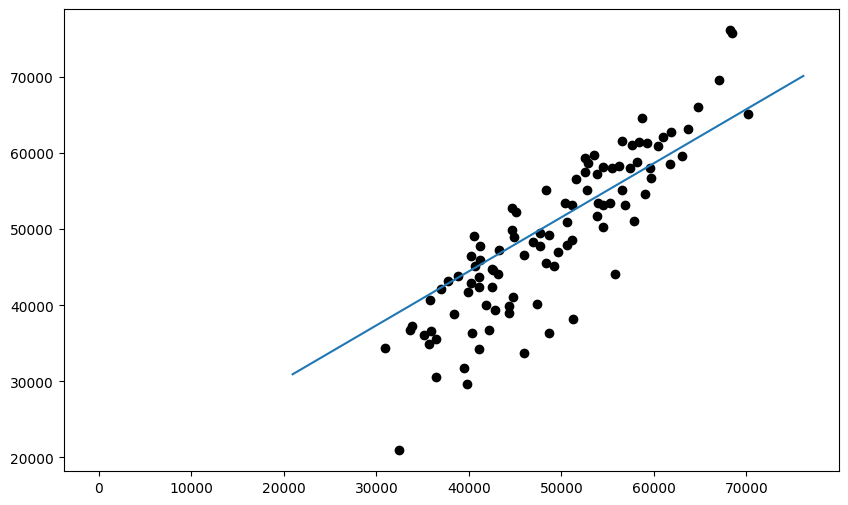

In [36]:
new=pd.DataFrame({
    "Experience_Years":2,
    "Age":41,
    "Projects_Done":9,
    "Education_Level":label.fit_transform(["Bachelors"]),
    "Department":label.fit_transform(["Marketing"]),
    "Gender":label.fit_transform(["Male"])
})
predict=model.predict(new)
predict
plt.figure(figsize=[10,6])
plt.scatter(y_pre,y_test,c="k")
plt.plot([y_test.min(),y_test.max()],[y_pre.min(),y_pre.max()])
plt.plot(new,predict)
plt.show()
